In [10]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
# import imageio.v3 as iio
import imageio as iio
from mlxtend.image import extract_face_landmarks
from PIL import Image

In [ ]:
pip install dlib

## This is for testing get_compo() function from utils.py

In [11]:
# all image feat Nxd and the path for each image
images ='./dataset/celeba/images'
image_path = [x for x in glob.glob(os.path.join(images, '*', '*')) if len(x.split('/')[-1].split('\\')[-1]) == 10]

In [12]:
# 'forehead', 'eyebrow', 'eye', 'mouth', 'chin', 'cheek', 'nose', 'ear', 'temple', 'nostril', 'tooth', 'lip', 'tongue', 'skin'
landmarks = extract_face_landmarks(iio.imread(image_path[151]))
print(image_path[151])
print(landmarks)

./dataset/celeba/images\1\000355.jpg
[[ 49 110]
 [ 50 121]
 [ 52 133]
 [ 55 144]
 [ 60 154]
 [ 66 163]
 [ 73 170]
 [ 81 175]
 [ 91 175]
 [101 173]
 [109 168]
 [115 160]
 [121 151]
 [125 141]
 [126 131]
 [127 120]
 [127 109]
 [ 55 105]
 [ 60  99]
 [ 68  98]
 [ 75 100]
 [ 82 102]
 [ 94 102]
 [101 100]
 [109  98]
 [117  99]
 [123 105]
 [ 88 111]
 [ 88 117]
 [ 89 124]
 [ 89 131]
 [ 80 137]
 [ 85 138]
 [ 89 138]
 [ 93 137]
 [ 97 137]
 [ 63 111]
 [ 67 110]
 [ 72 110]
 [ 77 112]
 [ 72 114]
 [ 67 114]
 [100 113]
 [105 110]
 [110 110]
 [114 111]
 [110 114]
 [105 114]
 [ 74 153]
 [ 79 149]
 [ 85 147]
 [ 89 149]
 [ 93 147]
 [ 99 149]
 [103 152]
 [ 99 158]
 [ 94 160]
 [ 89 161]
 [ 85 161]
 [ 79 158]
 [ 76 153]
 [ 85 152]
 [ 89 153]
 [ 93 152]
 [101 152]
 [ 93 152]
 [ 89 153]
 [ 85 152]]


In [251]:
# eye
# x = [x for x in range(landmarks[36, 0], landmarks[39, 0])] + [x for x in range(landmarks[42, 0], landmarks[45, 0])]
# x
# y = [x for x in range(landmarks[38, 1] if landmarks[38, 1] < landmarks[44, 1] else landmarks[44, 1], landmarks[40, 1] if landmarks[40, 1] < landmarks[46, 1] else landmarks[46, 1])]
# y

In [252]:
# forehead
# x = [i for i in range(landmarks[17, 0], landmarks[26, 0])]
# y = [j for j in range(70, landmarks[19, 1] if landmarks[19, 1] > landmarks[24, 1] else landmarks[24, 1])]

In [253]:
x = [i for i in range(landmarks[17, 0], landmarks[21, 0])] + [x for x in range(landmarks[22, 0], landmarks[26, 0])]
y = [j for j in range(landmarks[19, 1] if landmarks[19, 1] > landmarks[24, 1] else landmarks[24, 1], landmarks[17, 1] if landmarks[17, 1] < landmarks[22, 1] else landmarks[22, 1])]

In [254]:
x

[55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121]

In [255]:
y

[98, 99, 100, 101, 102]

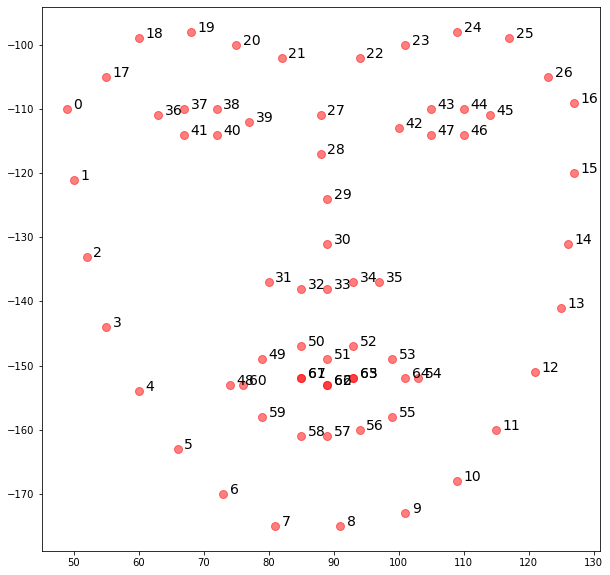

In [13]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
plt.plot(landmarks[:,0], -landmarks[:,1], 'ro', markersize=8, alpha = 0.5)
for i in range(landmarks.shape[0]):
    plt.text(landmarks[i,0]+1, -landmarks[i,1], str(i), size=14)

plt.show()

In [257]:
img = Image.open('./dataset/celeba/images/1/000355.jpg')
pil_img = img.convert('RGB')
arr_img = np.array(pil_img.getdata(), dtype=np.uint8).reshape(pil_img.height, pil_img.width, 3)

In [258]:
print(arr_img.shape)
print(arr_img)

(218, 178, 3)
[[[  9   8   4]
  [ 10   9   5]
  [ 11  10   6]
  ...
  [ 22  18  15]
  [ 21  17  14]
  [ 21  17  14]]

 [[  9   8   4]
  [ 10   9   5]
  [ 11  10   6]
  ...
  [ 22  18  15]
  [ 21  17  14]
  [ 21  17  14]]

 [[  9   8   4]
  [ 10   9   5]
  [ 11  10   6]
  ...
  [ 22  18  15]
  [ 21  17  14]
  [ 21  17  14]]

 ...

 [[253 253 251]
  [248 248 246]
  [242 242 240]
  ...
  [198 199 191]
  [237 236 231]
  [230 229 225]]

 [[246 246 244]
  [244 244 242]
  [242 242 240]
  ...
  [222 223 215]
  [246 245 241]
  [246 245 243]]

 [[242 242 240]
  [241 241 239]
  [240 240 238]
  ...
  [222 223 215]
  [246 245 241]
  [246 245 243]]]


In [259]:
for i in range(len(arr_img)):
    for j in range(len(arr_img[i])):
        if not(j in x and i in y):
            arr_img[i][j] = np.array([0, 0, 0])
pil_img = Image.fromarray(arr_img)
pil_img.save(os.path.join(os.getcwd(), 'images\img.jpg'))